In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

In [13]:
X, y = make_circles(n_samples=1000,noise=0.03)

In [17]:
X.shape, y.shape

((1000, 2), (1000,))

In [33]:
df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'label': y})
df

,X1,X2,label
0,0.319598,0.724006,1
1,-0.661993,-0.784063,0
2,0.575096,-0.556556,1
3,0.385659,0.973028,0
4,0.794953,0.169515,1
...,...,...,...
995,0.336761,0.770373,1
996,-0.832933,0.578863,0
997,-0.419417,0.666599,1
998,-0.891998,-0.467334,0


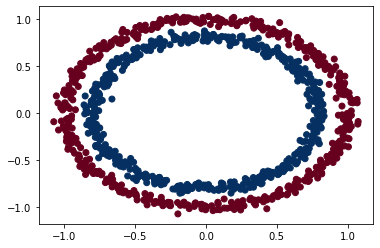

In [42]:
plt.scatter(df['X1'], df['X2'], c=y, cmap=plt.cm.RdBu)

## Split into Training and Testing sets

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

## Modelling

1. create a model
2. compile a model
3. fit the model
4. evaluate our model
5. improve our model
6. repeat if not satisfied

In [50]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile our model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

# fit the model
model.fit(tf.constant(X_train), tf.constant(y_train), epochs=10)

Epoch 1/10
25/25 [==============================] - 0s 833us/step - loss: 2.9483 - accuracy: 0.4563
Epoch 2/10
25/25 [==============================] - 0s 815us/step - loss: 0.7535 - accuracy: 0.5088
Epoch 3/10
25/25 [==============================] - 0s 854us/step - loss: 0.7151 - accuracy: 0.5088
Epoch 4/10
25/25 [==============================] - 0s 901us/step - loss: 0.7029 - accuracy: 0.5063
Epoch 5/10
25/25 [==============================] - 0s 869us/step - loss: 0.6975 - accuracy: 0.5075
Epoch 6/10
25/25 [==============================] - 0s 909us/step - loss: 0.6958 - accuracy: 0.5013
Epoch 7/10
25/25 [==============================] - 0s 882us/step - loss: 0.6950 - accuracy: 0.4975
Epoch 8/10
25/25 [==============================] - 0s 859us/step - loss: 0.6942 - accuracy: 0.5013
Epoch 9/10
25/25 [==============================] - 0s 836us/step - loss: 0.6942 - accuracy: 0.4837
Epoch 10/10
25/25 [==============================] - 0s 853us/step - loss: 0.6944 - accuracy: 0.4863

## Improving our classification model

In [74]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1),
])

# compile
model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# fit the model
model2.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 923us/step - loss: 2.1782 - accuracy: 0.4963
Epoch 2/20
25/25 [==============================] - 0s 963us/step - loss: 0.7963 - accuracy: 0.4588
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.7593 - accuracy: 0.3825
Epoch 4/20
25/25 [==============================] - 0s 960us/step - loss: 0.7511 - accuracy: 0.3487
Epoch 5/20
25/25 [==============================] - 0s 986us/step - loss: 0.7470 - accuracy: 0.3688
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.7434 - accuracy: 0.3625
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.7393 - accuracy: 0.3663
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7355 - accuracy: 0.3363
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7314 - accuracy: 0.3500
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7252 - accuracy: 0.3887
Epoch 11/20

In [88]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,np.array(model2.predict(X_test)).round()))

,0,1
0,72,31
1,31,66


In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

In [93]:
y_pred = model2.predict(X_test)
roc_auc_score(y_test, y_pred)

0.708637773996597

0.49813297

In [104]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

In [105]:
threshold

array([1.5739131 , 0.57391304, 0.54666007, 0.5440653 , 0.5431708 ,
       0.54254085, 0.5423306 , 0.54219276, 0.54201484, 0.5379197 ,
       0.53661686, 0.533168  , 0.5316725 , 0.5293562 , 0.5287563 ,
       0.5283575 , 0.5268849 , 0.52614355, 0.5222975 , 0.52188116,
       0.51896495, 0.5186284 , 0.51446164, 0.51384133, 0.51367855,
       0.51341283, 0.51331836, 0.51329345, 0.5108371 , 0.50870377,
       0.50860256, 0.50825995, 0.50821   , 0.5078148 , 0.5055222 ,
       0.5030177 , 0.5026621 , 0.5024057 , 0.49995345, 0.49905908,
       0.4983582 , 0.49779278, 0.49737453, 0.49646974, 0.49487722,
       0.490404  , 0.48962504, 0.48872232, 0.48789036, 0.4855703 ,
       0.4845971 , 0.48458248, 0.4841804 , 0.4834895 , 0.48253196,
       0.4820447 , 0.48124993, 0.478154  , 0.47788876, 0.47555655,
       0.47409075, 0.46957225, 0.4694655 , 0.46867692, 0.46866566,
       0.4662155 , 0.46529746, 0.46208602, 0.46199203, 0.45977014,
       0.4592963 , 0.4552191 , 0.45492005, 0.45477897, 0.45303

In [113]:
y_test.squeeze() == threshold.round()

array([2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

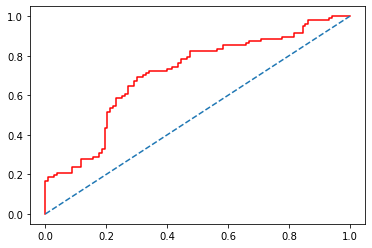

In [132]:
plt.plot(fpr, tpr, c='r')
plt.plot([0,1],[0,1], linestyle='--');

## Multi Classification Problem

In [6]:
from tensorflow.keras.datasets import fashion_mnist

In [7]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [282]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
],name='Model1')

# Compile our model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
model_history = model.fit(X_train/255., y_train, epochs=10, validation_data=(X_test/255., y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1773 - accuracy: 0.5865 - val_loss: 0.8219 - val_accuracy: 0.7377
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7144 - accuracy: 0.7627 - val_loss: 0.6826 - val_accuracy: 0.7713
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6209 - accuracy: 0.7913 - val_loss: 0.6236 - val_accuracy: 0.7921
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5762 - accuracy: 0.8024 - val_loss: 0.5972 - val_accuracy: 0.7963
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5545 - accuracy: 0.8072 - val_loss: 0.5830 - val_accuracy: 0.7965
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5405 - accuracy: 0.8112 - val_loss: 0.5748 - val_accuracy: 0.8039
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5303 - accuracy: 0.8135 - val_loss: 0.5870 - val_accuracy:

In [276]:
model.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [288]:
history = pd.DataFrame(model_history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,1.177269,0.586533,0.821942,0.7377
1,0.714422,0.762700,0.682647,0.7713
2,0.620875,0.791333,0.623602,0.7921
3,0.576189,0.802417,0.597160,0.7963
4,0.554528,0.807233,0.582976,0.7965
5,0.540514,0.811250,0.574759,0.8039
6,0.530334,0.813533,0.587002,0.7926
7,0.522151,0.815983,0.560286,0.8099
8,0.516047,0.818467,0.542756,0.8095
9,0.511160,0.820333,0.541957,0.8107


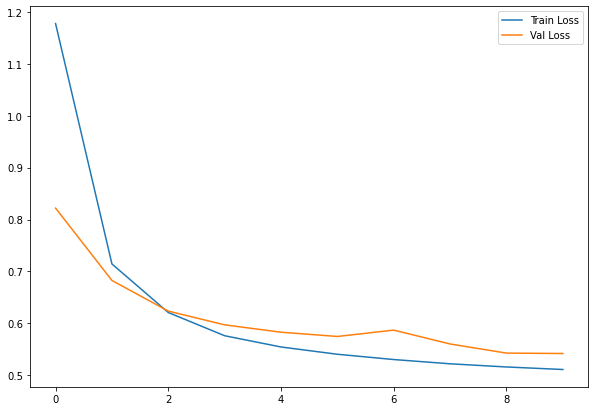

In [294]:
# Visualize the history
plt.figure(figsize=(10,7))
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.legend();

## Create A Learning Rate Callback

In [296]:
# Normalize our data
X_train_norm = X_train/255.
X_test_norm = X_test/255.

In [326]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile our model

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3*10**(x/10))

# fit the model
history_2 = model2.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test), callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2752 - accuracy: 0.4979 - val_loss: 0.9975 - val_accuracy: 0.6177 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8832 - accuracy: 0.6571 - val_loss: 0.8285 - val_accuracy: 0.6872 - lr: 0.0013
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7551 - accuracy: 0.7230 - val_loss: 0.7863 - val_accuracy: 0.7010 - lr: 0.0016
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6948 - accuracy: 0.7461 - val_loss: 0.7181 - val_accuracy: 0.7412 - lr: 0.0020
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6734 - accuracy: 0.7512 - val_loss: 0.7051 - val_accuracy: 0.7480 - lr: 0.0025
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6647 - accuracy: 0.7538 - val_loss: 0.6931 - val_accuracy: 0.7493 - lr: 0.0032
Epoch 7/20
1875/1875 [==============================] - 2s

In [11]:
def plot_lr(history):
    
    epochs = len(history.history['loss'])
    lr = 1e-3*10**(tf.range(epochs)/20)
    plt.semilogx(lr, history.history['loss'])
    plt.xlabel('Learning Rate')
    plt.ylabel('Loss')

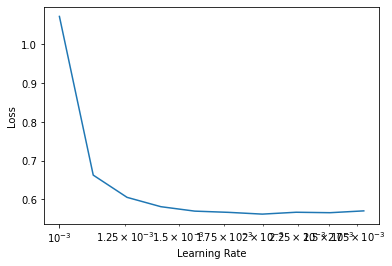

In [318]:
plot_lr(history_2)

Now from our plot the model loss shows to be going down sharply until a sharp break before 0.6, so if we compute the point at which our learning rate was sharply going down at `10^-3` we get 0.001 learning rate. With this we can add this learning rate to our optimizer parameter

In [325]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile our model
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics='accuracy')

# learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3*10**(x/20))

# fit our model
history_3 = model3.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm,y_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1057 - accuracy: 0.6074 - val_loss: 0.7457 - val_accuracy: 0.7423
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6836 - accuracy: 0.7601 - val_loss: 0.6625 - val_accuracy: 0.7705
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6216 - accuracy: 0.7801 - val_loss: 0.6195 - val_accuracy: 0.7831
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5923 - accuracy: 0.7898 - val_loss: 0.5960 - val_accuracy: 0.7926
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5737 - accuracy: 0.7965 - val_loss: 0.5875 - val_accuracy: 0.7919
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5575 - accuracy: 0.8021 - val_loss: 0.5792 - val_accuracy: 0.7981
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5467 - accuracy: 0.8067 - val_loss: 0.5646 - val_accuracy:

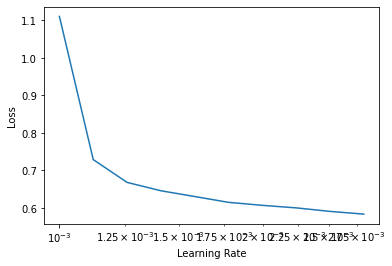

In [324]:
plot_lr(history_3)

In [364]:
import wandb
from wandb.keras import WandbCallback

wandb.init(project="Multi Label Classification Revision", entity="acnice")

accuracy,▃▁▅▇████████
epoch,▁▁▂▃▃▄▅▆▆▇█▁
loss,█▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▆▇██▇██▇▇█
val_loss,█▂▁▁▁▁▁▁▁▁▁▁
accuracy,0.83088
best_epoch,0
best_val_loss,0.5222
epoch,0
loss,0.48883
val_accuracy,0.8187


In [365]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}

# ... Define a model
history_3 = model3.fit(X_train_norm, y_train, epochs=10,callbacks=[WandbCallback(), lr_scheduler], validation_data=(X_test_norm,y_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4830 - accuracy: 0.8330 - val_loss: 0.5206 - val_accuracy: 0.8203 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4840 - accuracy: 0.8334 - val_loss: 0.5198 - val_accuracy: 0.8213 - lr: 0.0013
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4852 - accuracy: 0.8320 - val_loss: 0.5224 - val_accuracy: 0.8168 - lr: 0.0016
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4863 - accuracy: 0.8325 - val_loss: 0.5355 - val_accuracy: 0.8147 - lr: 0.0020
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4910 - accuracy: 0.8310 - val_loss: 0.5293 - val_accuracy: 0.8189 - lr: 0.0025
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4937 - accuracy: 0.8279 - val_loss: 0.5680 - val_accuracy: 0.8032 - lr: 0.0032
Epoch 7/10
1875/1875 [==============================] - 3s

In [379]:
from sklearn.metrics import confusion_matrix

y_pred = model3.predict(X_test_norm)
y_pred[0], y_pred[0].argmax()

(array([6.3052674e-08, 2.1242458e-15, 6.3492799e-08, 9.9132920e-13,
        3.0890246e-07, 2.6781997e-01, 1.8381691e-06, 7.8524046e-02,
        9.2779249e-03, 6.4437568e-01], dtype=float32),
 9)

In [416]:
y_pred[:10].argmax(1)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

<AxesSubplot:>

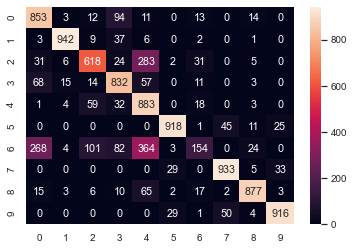

In [436]:
import seaborn as sns

sns.set(font_scale=.9)
sns.heatmap(confusion_matrix(y_test, y_pred.argmax(1)), annot=True, fmt='.0f')

In [10]:
import random
def plot_random_img(model, images, true_labels, classes):
    
    i = random.randint(0, len(images))
    
    # create predictions and target
    target_image = images[i]
    pred_probs = model.predict(tf.expand_dims(target_image,axis=0)) #Predict a single image
    pred_label = classes[pred_probs.argmax()]
    true_labels = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    #change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_labels:
        color = 'green'
    else:
        color = 'red'
        
    # Add xlabel info
    plt.title(f'pred:{pred_label} \n {tf.round(100*tf.reduce_max(pred_probs))}% (True: {true_labels})', color=color)

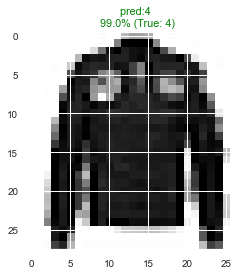

In [496]:
# Checkout a radom image prediction
plot_random_img(model3, X_test_norm, y_test,list(np.arange(10)) )

In [535]:
from tensorflow.keras.utils import plot_model
plot_model(model3, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## Using CNN to Make Prediction

In [602]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=5, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=5, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(5,3, activation='relu'),
    tf.keras.layers.Conv2D(5,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model
model4.fit(X_train_norm, y_train,
           epochs=10,
           validation_data=(X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6873 - accuracy: 0.7513 - val_loss: 0.5486 - val_accuracy: 0.8025
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4904 - accuracy: 0.8195 - val_loss: 0.4982 - val_accuracy: 0.8162
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4461 - accuracy: 0.8369 - val_loss: 0.4645 - val_accuracy: 0.8274
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4176 - accuracy: 0.8495 - val_loss: 0.4308 - val_accuracy: 0.8428
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3969 - accuracy: 0.8561 - val_loss: 0.4312 - val_accuracy: 0.8440
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3827 - accuracy: 0.8622 - val_loss: 0.4165 - val_accuracy: 0.8522
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3723 - accuracy: 0.8673 - val_loss: 0.4060 -

In [546]:
model4.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 10)         0         
 g2D)                                                

In [547]:
model3.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_65 (Dense)            (None, 4)                 3140      
                                                                 
 dense_66 (Dense)            (None, 4)                 20        
                                                                 
 dense_67 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


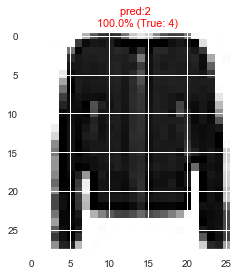

In [564]:
plot_random_img(model4, X_test, y_test, list(np.arange(0,10)))

In [566]:
model4.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2922 - accuracy: 0.8978


[0.29221099615097046, 0.8978000283241272]

In [567]:
model3.evaluate(X_test_norm, y_test)

313/313 [==============================] - 0s 857us/step - loss: 0.5952 - accuracy: 0.7926


[0.5951793193817139, 0.7925999760627747]

In [596]:
preds = model4.predict(X_test_norm).argmax(axis=1) == y_test

In [601]:
np.unique(preds, return_counts=True)

(array([False,  True]), array([1022, 8978]))

In [589]:
model3.predict(X_test_norm[293].reshape(1,28,28)).argmax()

6

In [590]:
y_test[293]

6

# Transfer Learning

Transfer Learning allows us to leverage similar model architectures that has proven to work for our own problem.

**Callbacks:** Callbacks are extra functionality you can add to you model to be performed during or after training. Some popular callbacks are:

* Tracking experiments with `Tensorboard` callback
* Model Checkpoint with the `ModelCheckpoint` callback
* Stopping a model from training (to avoid overfitting) with the `EarlyStopping` callback

In [9]:
# create a tensorboard callback (functionized just in case we need to create a new one for each experiment)
import datetime 

def create_tensorboard_callback(dir_name, experiment_name:str):
    
    # Create a dirpath of where it will be stored
    log_dir = datetime.datetime.now().strftime('%Y_%m_%d_%H%M%S')+'_'+experiment_name.lower()
    
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f'Saved Tensorboard log files to: {log_dir}')
    
    return tensorboard_callback

In other 

In [4]:
resnet50_url ='https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'
efficentB0_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/classification/1'

In [10]:
!pip3 install tensorflow_hub

     |████████████████████████████████| 108 kB 630 kB/s            
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [11]:
# import tensorflow hub
import tensorflow_hub as hub

In [119]:
def create_transfer_learning_model(model_url, num_classes=10):
    """
    Takes a tensorflow hub URL and create a Keras Sequential Model with it.
    
    Args:
        model_url (str): A url to a tensorflow hub model
        num_classes (int): The number of classes to train for
    
    Returns:
        model (tf.keras.Sequential): A compiled Keras model
    """
    
    # Dowload the pretrained model and save it to keras layer
    feature_extraction_layer = hub.KerasLayer(model_url, 
                                              trainable=False,
                                              name='FeatureExtractionLayer',
                                              input_shape=(28,28,3)
                                             )
    
    # Create our own model
    model = tf.keras.Sequential([
        feature_extraction_layer,
        tf.keras.layers.Dense(num_classes, activation='softmax', name='Output_Layer')
    ])
    
    return model

In [120]:
# EfficientNet Model
efficient_model = create_transfer_learning_model(efficentB0_url)

# Resnet Model
resnet_model = create_transfer_learning_model(resnet)

In [123]:
efficient_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FeatureExtractionLayer (Ker  (None, 1000)             5330564   
 asLayer)                                                        
                                                                 
 Output_Layer (Dense)        (None, 10)                10010     
                                                                 
Total params: 5,340,574
Trainable params: 10,010
Non-trainable params: 5,330,564
_________________________________________________________________


In [54]:
# Resnet Model
resnet_model = create_transfer_learning_model(resnet50_url)

In [124]:
# compile our models
efficient_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])

# resnet_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#                      optimizer=tf.keras.optimizers.Adam(),
#                      metrics=['accuracy'])

In [63]:
import cv2

convert features from GrayScale to RGB in other to feed our transfer learning model

In [125]:
def convert_to_rgb(src):
    rgbs = []
    
    for i in range(src.shape[0]):
        new_img = cv2.cvtColor(src[i], cv2.COLOR_GRAY2RGB)
        rgbs.append(new_img)
        
    return tf.constant(rgbs)
    
    

In [111]:
# Convert 2D images to 3D image

X_train_norm = convert_to_rgb(X_train)
X_test_norm = convert_to_rgb(X_test)

In [135]:
# Normalize our images

X_train_norm, X_test_norm = tf.cast(X_train_norm, dtype=tf.float32)/255., tf.cast(X_test_norm, dtype=tf.float32)/255.

In [138]:
X_train_norm.shape, X_test_norm.shape

(TensorShape([60000, 28, 28, 3]), TensorShape([10000, 28, 28, 3]))

In [151]:
# Fit the models
efficient_model.fit(X_train_norm, y_train, epochs=5, 
                    validation_data=(X_test_norm, y_test), 
                    callbacks=[create_tensorboard_callback('Tensorboard_Callback','EfficientNetB0_Training')])

Saved Tensorboard log files to: 2022_02_13_225949_efficientnetb0_training
Epoch 1/5
1875/1875 [==============================] - 67s 35ms/step - loss: 1.5298 - accuracy: 0.6473 - val_loss: 1.5207 - val_accuracy: 0.6471
Epoch 2/5
1875/1875 [==============================] - 76s 40ms/step - loss: 1.5095 - accuracy: 0.6490 - val_loss: 1.5011 - val_accuracy: 0.6513
Epoch 3/5
1875/1875 [==============================] - 76s 41ms/step - loss: 1.4901 - accuracy: 0.6506 - val_loss: 1.4822 - val_accuracy: 0.6515
Epoch 4/5
1875/1875 [==============================] - 82s 44ms/step - loss: 1.4715 - accuracy: 0.6515 - val_loss: 1.4641 - val_accuracy: 0.6521
Epoch 5/5
1875/1875 [==============================] - 88s 47ms/step - loss: 1.4538 - accuracy: 0.6524 - val_loss: 1.4471 - val_accuracy: 0.6534


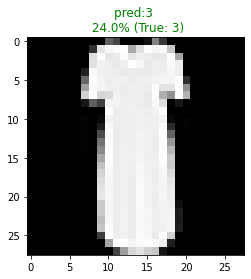

In [153]:
plot_random_img(efficient_model, X_test_norm, y_test, list(np.arange(0,10)))

In [ ]:
# Log our model on Tensorboard
! tensorboard dev upload --logdir 2022_02_13_225949_efficientnetb0_training --name='EfficientNet Training and Validation'


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

2022_02_13_225949_efficientnetb0_training

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) 

In [3]:
! tensorboard dev list

https://tensorboard.dev/experiment/v2j1mG2eRQWwpmBDjLV3yQ/
	Name                 EfficientNet Training and Validation
	Description          [No Description]
	Id                   v2j1mG2eRQWwpmBDjLV3yQ
	Created              2022-02-13 23:30:18 (11 hours ago)
	Updated              2022-02-13 23:34:36 (11 hours ago)
	Runs                 2
	Tags                 5
	Scalars              30
	Tensor bytes         0
	Binary object bytes  4099901
https://tensorboard.dev/experiment/2qgVhNOmQXmjC952e2Umlg/
	Name                 EfficientNet Training and Validation
	Description          [No Description]
	Id                   2qgVhNOmQXmjC952e2Umlg
	Created              2022-02-13 23:25:39 (11 hours ago)
	Updated              2022-02-13 23:25:40 (11 hours ago)
	Runs                 1
	Tags                 1
	Scalars              0
	Tensor bytes         0
	Binary object bytes  80
https://tensorboard.dev/experiment/p1sBGlkyRRKGdxyCVWMhvg/
	Name                 (optional) My latest experiment
	Descri

In [47]:
efficient_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FeatureExtractionLayer (Ker  (None, 1000)             5330564   
 asLayer)                                                        
                                                                 
 Output_Layer (Dense)        (None, 10)                10010     
                                                                 
Total params: 5,340,574
Trainable params: 10,010
Non-trainable params: 5,330,564
_________________________________________________________________


In [48]:
resnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FeatureExtractionLayer (Ker  (None, 1001)             25615849  
 asLayer)                                                        
                                                                 
 Output_Layer (Dense)        (None, 10)                10020     
                                                                 
Total params: 25,625,869
Trainable params: 10,020
Non-trainable params: 25,615,849
_________________________________________________________________


In [105]:
X_train_norm.shape

(60000, 28, 28)

## Transfer Learning Fine Tuning
Adjusting the pretrained model weights

In [34]:
#  Let's use functional Api Modelling to create our model this time

# create our base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# create our input layer
inputs = tf.keras.layers.Input(shape=(228,228,3))

# freeze the model weights
base_model.trainable = False

# Normalize if model is Resnet50v2
# x = tf.keras.layers.experimental.preprocessing.Rescale(1./255)(inputs)

# otherwise:

x = base_model(inputs)
print(x.shape)

# AveragePool (Aggregrate all the most important feature information, reduce number of computations)

x = tf.keras.layers.GlobalAveragePooling2D(name='GlobalAveragePooling')(x)

# Create teh output layer

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

# Model
functional_api_model = tf.keras.Model(inputs, outputs)

functional_api_model.summary()

(None, 7, 7, 1280)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 228, 228, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GlobalAveragePooling (Globa  (None, 1280)             0         
 lAveragePooling2D)                                              
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [35]:
# compile the functional API model
functional_api_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                             optimizer = tf.keras.optimizers.Adam(),
                             metrics = ['accuracy'])